In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from tqdm import tqdm
os.chdir('../')
from python_code import glm_fitter as glm
import matplotlib.style as style
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
style.use('ggplot')

In [2]:
data = pd.read_csv('../data/wdbc.csv', header=None)
data.iloc[:,1] = (data.iloc[:,1] == 'M').astype(int)
X = np.array(data.iloc[:,2:12])
y = np.array(data.iloc[:,1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1e-5, random_state=40)

In [115]:
clf = glm.LogisticRegression(fit_intercept=True, max_iteration=10000, learning_rate = 1, tol=1e-6)
clf.fit(X_train, y_train, method='Newton')

  0%|▏                                                                                                                                                                                     | 7/10000 [00:00<00:21, 472.43it/s]


'Tolerance achieved'

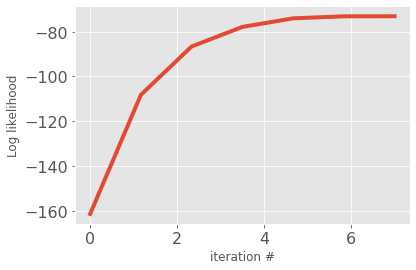

In [116]:
iterations = np.linspace(0,clf.last_iteration, clf.last_iteration)
plt.plot(iterations, clf.log_likelihood)
plt.xlabel('iteration #')
plt.ylabel('Log likelihood');

In [117]:
clf.log_likelihood[-1]

-73.0632407325152

In [152]:
def test_sk(X_train, y_train):
    X_sk = clf._scale_data(X_train)
    skl_clf = LogisticRegression(fit_intercept=True, solver='newton-cg')
    skl_clf.fit(X_sk, y_train)
    betas_sk = np.concatenate((skl_clf.intercept_.flatten(), skl_clf.coef_.flatten()))
    skl_standard_error = clf.calculate_standard_error(betas_sk.flatten(),  clf._make_intercept(X_sk))
    return betas_sk, skl_standard_error
    

In [153]:
betas_sk, skl_standard_error = test_sk(X_train, y_train)

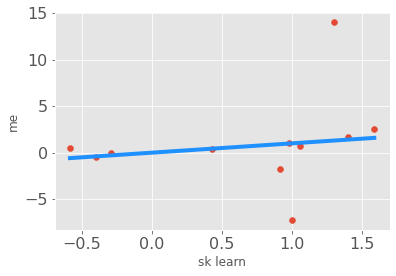

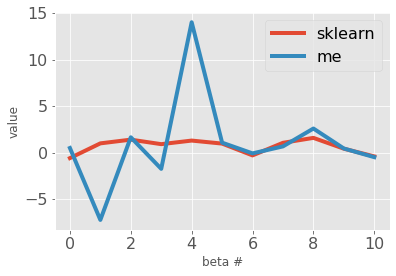

In [154]:
fig, ax = plt.subplots()
ax.scatter(betas_sk, clf.betas)
plt.plot([betas_sk.min(), betas_sk.max()],[betas_sk.min(), betas_sk.max()], color='dodgerblue')
ax.set_xlabel('sk learn')
ax.set_ylabel('me')
plt.figure()
plt.plot(betas_sk, label='sklearn')
plt.plot(clf.betas, label='me')
plt.legend()
plt.xlabel('beta #')
plt.ylabel('value');

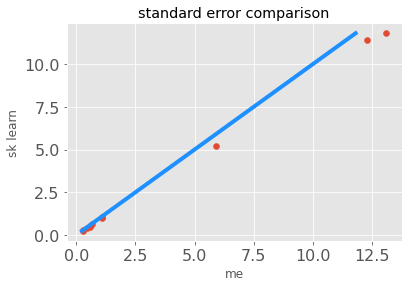

In [155]:
fig, ax = plt.subplots()
ax.scatter(clf.standard_error, skl_standard_error)
plt.plot([skl_standard_error.min(), skl_standard_error.max()],[skl_standard_error.min(), skl_standard_error.max()], color='dodgerblue')

ax.set_xlabel('me')
ax.set_ylabel('sk learn');
ax.set_title('standard error comparison');

### try linear reg

In [156]:
from scipy.stats import norm
dist = norm(0,1)
x = np.linspace(0,10,100)
y = x + dist.rvs(size=100)

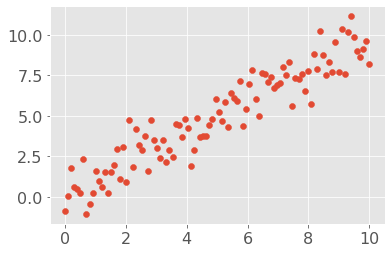

In [157]:
plt.scatter(x, y)

In [127]:
lr = glm.LinearRegression(fit_intercept=True,learning_rate = 0.01, scale=False)

In [100]:
lr.fit(x.reshape(-1,1), y, method='Newton')

  8%|███████████████▏                                                                                                                                                                   | 680/8000 [00:00<00:00, 10111.84it/s]


'Tolerance achieved'

In [101]:
lr.betas

array([0.0989829 , 0.97610207])

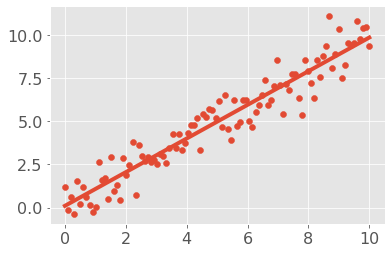

In [102]:
plt.plot(x, lr.predict(x.reshape(-1,1)))
plt.scatter(x, y);